In [518]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [519]:
df = pd.read_csv('/my/file/path/mental_health.csv')

In [520]:
df.head(5)

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [521]:
df.dtypes

Age                        object
Gender                     object
Occupation                 object
Days_Indoors               object
Growing_Stress             object
Quarantine_Frustrations    object
Changes_Habits             object
Mental_Health_History      object
Weight_Change              object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
dtype: object

In [522]:
df.nunique()

Age                        4
Gender                     2
Occupation                 5
Days_Indoors               5
Growing_Stress             3
Quarantine_Frustrations    3
Changes_Habits             3
Mental_Health_History      3
Weight_Change              3
Mood_Swings                3
Coping_Struggles           2
Work_Interest              3
Social_Weakness            3
dtype: int64

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


In [524]:
df.isnull().sum()

Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64

In [557]:
df.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


In [558]:
df.shape

(824, 13)

In [559]:
mental_health_columns = ['Growing_Stress','Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness' ]

## Distribution of Age group

In [560]:
df['Age'].value_counts().sort_index()

Age
16-20       211
20-25       186
25-30       205
30-Above    222
Name: count, dtype: int64

In [561]:
df.groupby('Age').Gender.describe()

,count,unique,top,freq
Age,,,,
16-20,211,2,Female,110
20-25,186,2,Male,94
25-30,205,2,Female,115
30-Above,222,2,Female,117


- For the '16-20' age group, the top gender is 'Female' with a frequency of 110.
- For the '20-25' age group, the top gender is 'Male' with a frequency of 94.
- For the '25-30' and '30-Above' age groups, the top gender is 'Female' with frequencies of 115 and 117, respectively.

In [562]:
df.groupby('Age').Occupation.describe()

,count,unique,top,freq
Age,,,,
16-20,211,5,Student,53
20-25,186,5,Student,43
25-30,205,5,Student,47
30-Above,222,5,Housewife,55


- For the '16-20' age group, the most frequent occupation is 'Student', occurring 53 times.
- For the '20-25' age group, the most frequent occupation is 'Student', occurring 43 times.
- For the '25-30' age group, the most frequent occupation is 'Student', occurring 47 times.
- For the '30-Above' age group, the most frequent occupation is 'Housewife', occurring 55 times.


### Exploring Mental Health Trends Across Age Groups

0 Growing_Stress 0 0
1 Quarantine_Frustrations 0 1
2 Changes_Habits 0 2
3 Mental_Health_History 1 0
4 Weight_Change 1 1
5 Mood_Swings 1 2
6 Coping_Struggles 2 0
7 Work_Interest 2 1
8 Social_Weakness 2 2


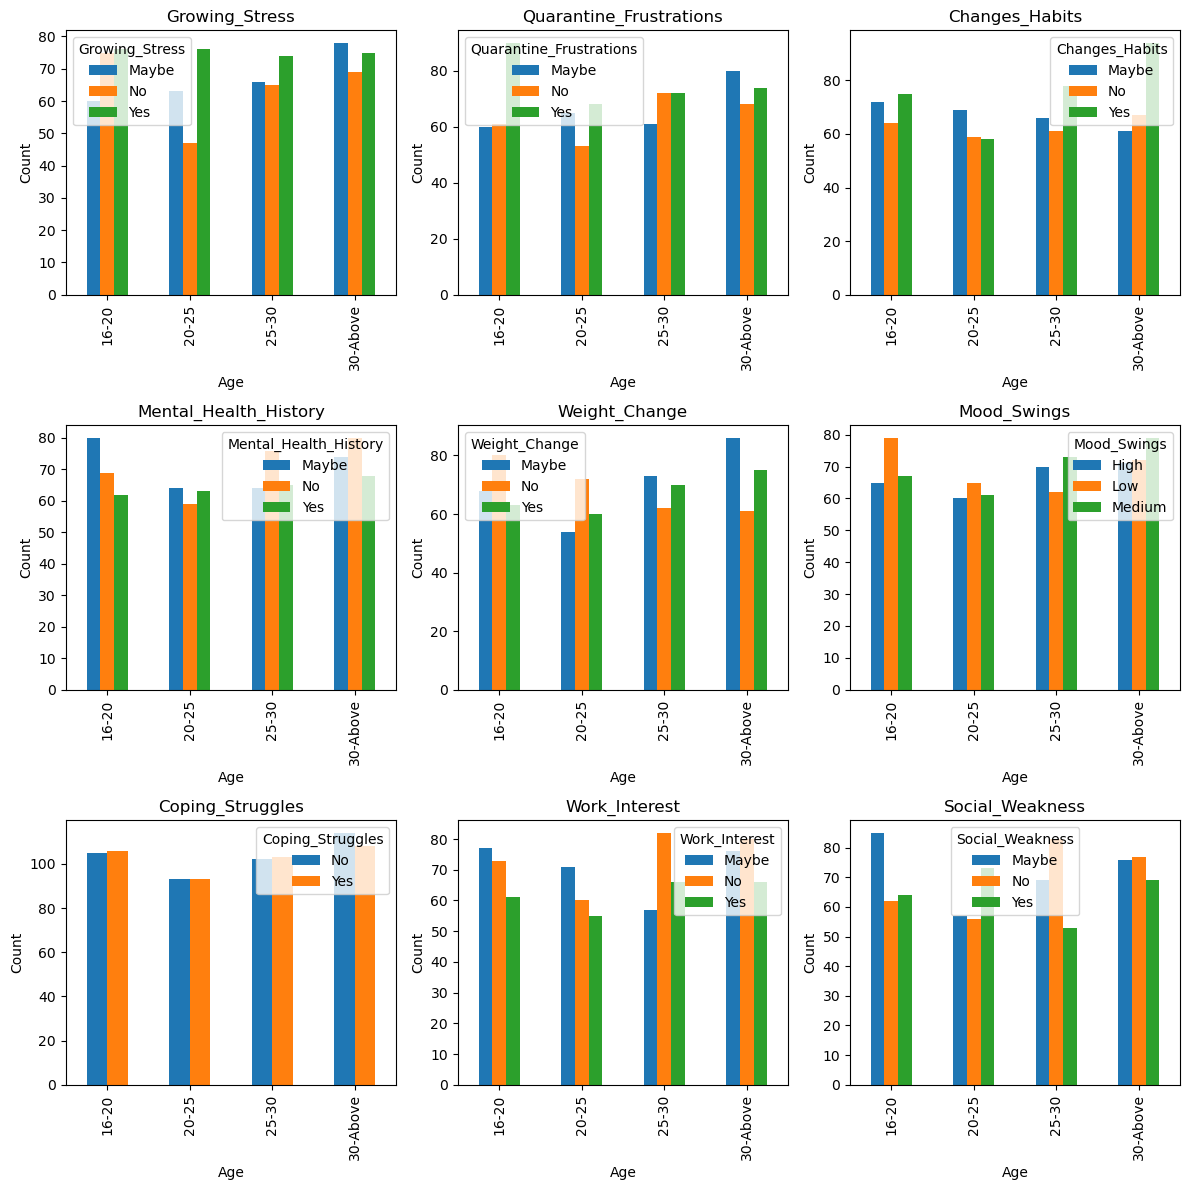

In [563]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i,column in enumerate(mental_health_columns):
    row = i // 3
    col = i % 3
    print(i, column, row, col)   #row, col is value for row and column for plot .
    df.groupby('Age')[column].value_counts().unstack().plot(kind='bar', stacked=False, ax=axs[row, col]) #here ax helps to decide which varible to plot where .
    axs[row, col].set_xlabel('Age')
    axs[row, col].set_ylabel('Count')
    axs[row, col].set_title(column)
plt.tight_layout()
plt.show()

## Distribution of Gender

In [584]:
df['Gender'].value_counts().sort_index()

Gender
Female    434
Male      390
Name: count, dtype: int64

In [585]:
df.groupby('Gender').Occupation.describe()

,count,unique,top,freq
Gender,,,,
Female,434,5,Student,99
Male,390,5,Housewife,89


- For females, the most common occupation is 'Student', occurring 99 times.
- For males, the most common occupation is 'Housewife', occurring 89 times.

In [586]:
df.groupby('Gender').Age.describe()

,count,unique,top,freq
Gender,,,,
Female,434,4,30-Above,117
Male,390,4,30-Above,105


- The most common age group for females is '30-Above', occurring 117 times, and for males, it is also '30-Above', occurring 105 times.

### Exploring Mental Health Trends Across Gender Distributions

0 Growing_Stress 0 0
1 Quarantine_Frustrations 0 1
2 Changes_Habits 0 2
3 Mental_Health_History 1 0
4 Weight_Change 1 1
5 Mood_Swings 1 2
6 Coping_Struggles 2 0
7 Work_Interest 2 1
8 Social_Weakness 2 2


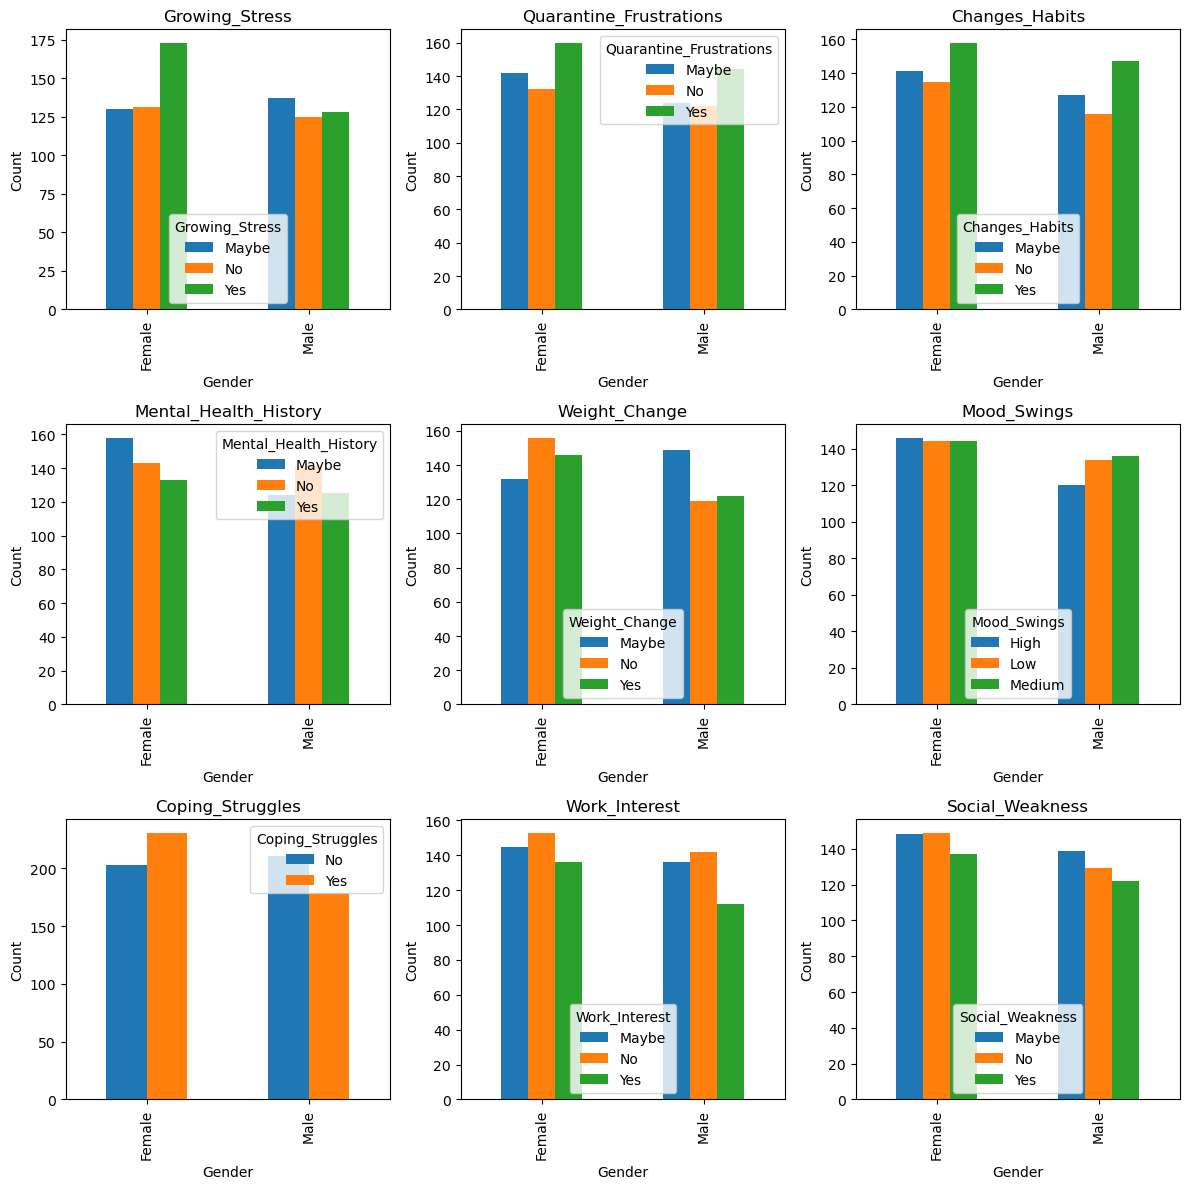

In [587]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, column in enumerate(mental_health_columns):
    row = i // 3
    col = i % 3
    print(i, column, row, col)
    df.groupby('Gender')[column].value_counts().unstack().plot(kind='bar', stacked=False,ax = axs[row, col])
    axs[row,col].set_xlabel('Gender')
    axs[row,col].set_ylabel('Count')
    axs[row,col].set_title(column)
    
   
plt.tight_layout()
plt.show()

## Occcupation distribution 

In [588]:
df['Occupation'].value_counts()

Occupation
Housewife    185
Student      180
Corporate    159
Others       155
Business     145
Name: count, dtype: int64

In [589]:
df.groupby('Occupation').Age.describe()

,count,unique,top,freq
Occupation,,,,
Business,145,4,20-25,42
Corporate,159,4,16-20,46
Housewife,185,4,30-Above,55
Others,155,4,30-Above,52
Student,180,4,16-20,53


- For the 'Business' occupation, the most common age group is '20-25', with a frequency of 42.
- For the 'Corporate' occupation, the most common age group is '16-20', with a frequency of 46.
- For the 'Housewife' occupation, the most common age group is '30-Above', with a frequency of 55.
- For the 'Others' occupation, the most common age group is also '30-Above', with a frequency of 52.
- For the 'Student' occupation, the most common age group is '16-20', with a frequency of 53.

In [590]:
df.groupby('Occupation').Gender.describe()

,count,unique,top,freq
Occupation,,,,
Business,145,2,Female,79
Corporate,159,2,Male,85
Housewife,185,2,Female,96
Others,155,2,Female,86
Student,180,2,Female,99


- For the 'Business' occupation, the most common gender is 'Female', occurring 79 times.
- For the 'Corporate' occupation, the most common gender is 'Male', occurring 85 times.
- For the 'Housewife' occupation, the most common gender is 'Female', occurring 96 times.
- For the 'Others' occupation, the most common gender is also 'Female', occurring 86 times.
- For the 'Student' occupation, the most common gender is 'Female', occurring 99 times.

###  Exploring Mental Health Trends Across Occupations

0 Growing_Stress 0 0
1 Quarantine_Frustrations 0 1
2 Changes_Habits 0 2
3 Mental_Health_History 1 0
4 Weight_Change 1 1
5 Mood_Swings 1 2
6 Coping_Struggles 2 0
7 Work_Interest 2 1
8 Social_Weakness 2 2


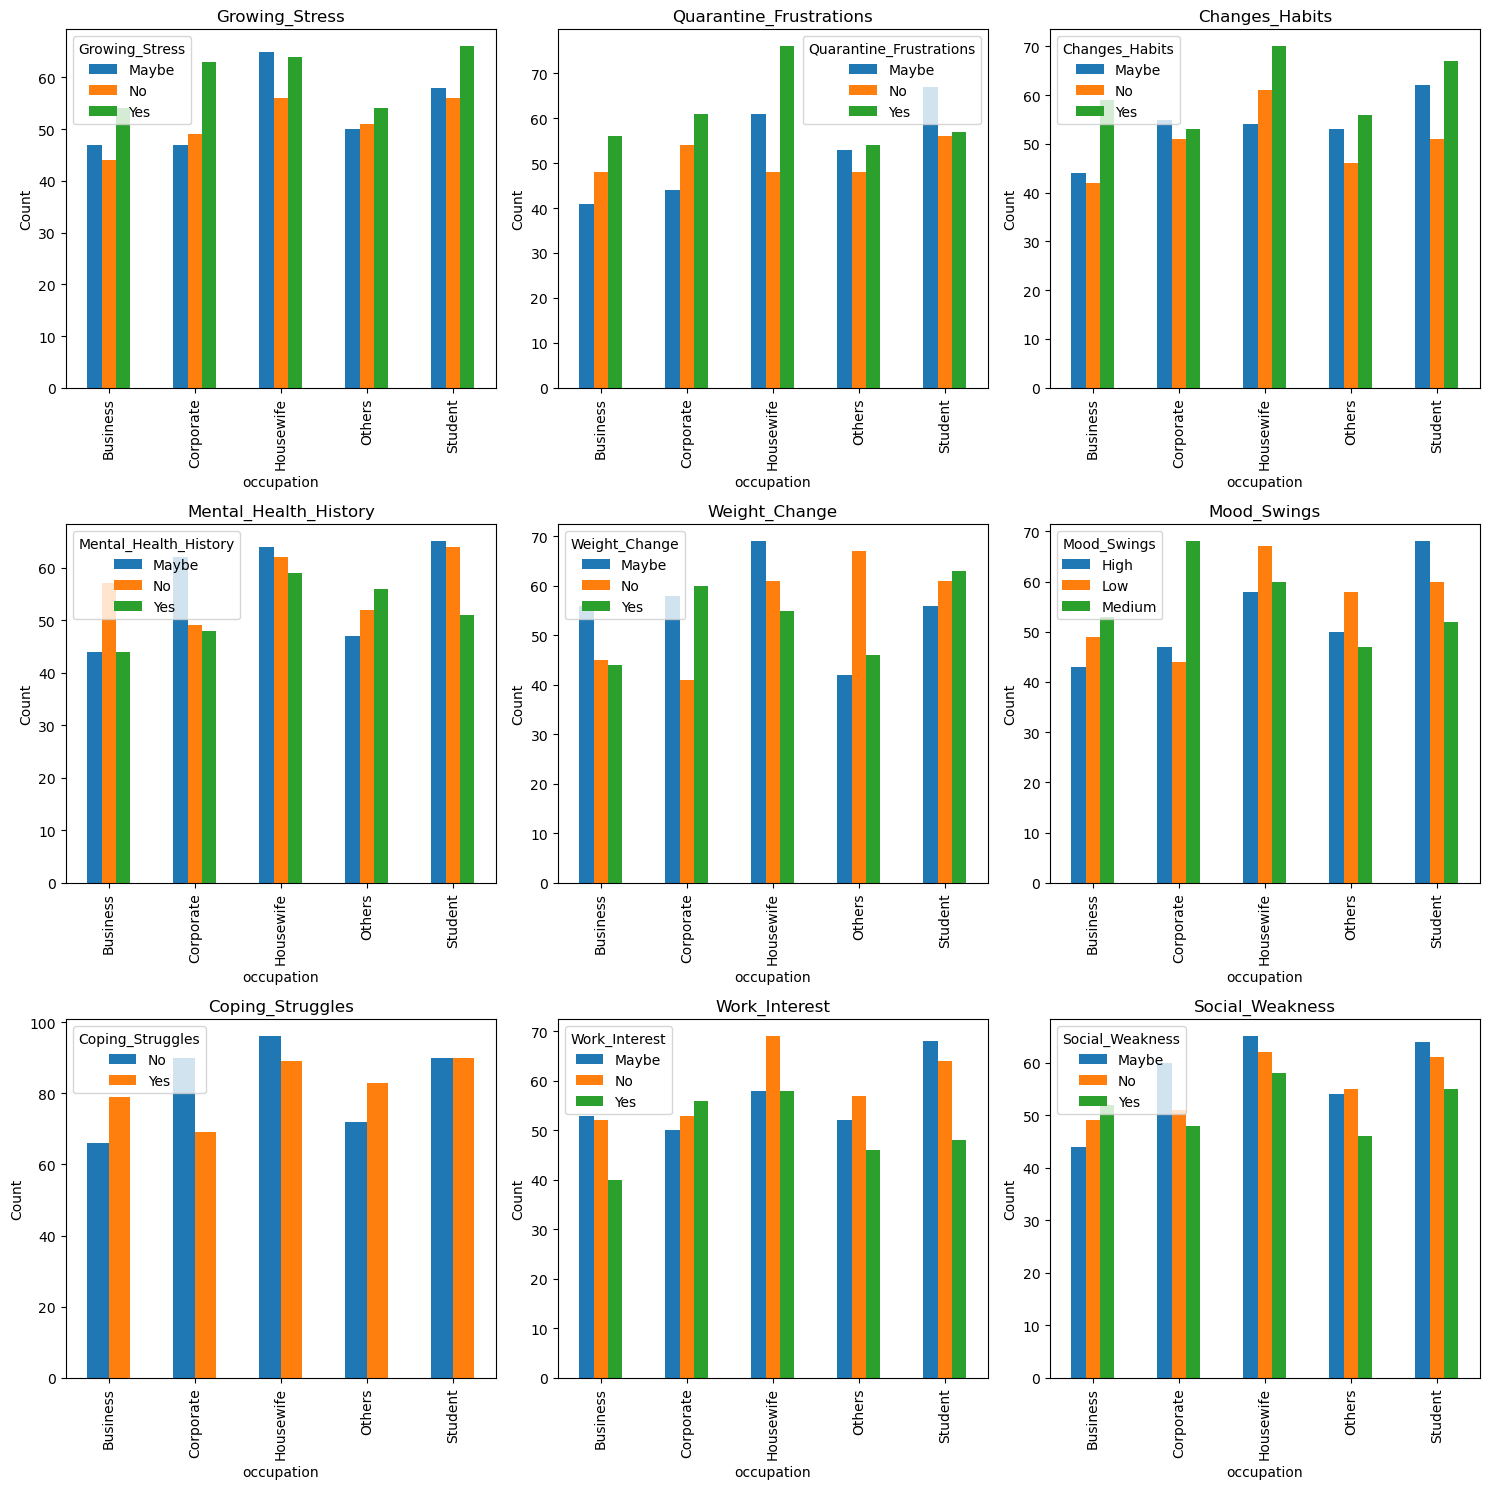

In [591]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))


for i, column in enumerate(mental_health_columns):
    row = i // 3
    col = i % 3
    print(i, column, row, col)
    df.groupby('Occupation')[column].value_counts().unstack().plot(kind='bar', stacked=False, ax=axs[row, col])
    axs[row, col].set_xlabel('occupation')
    axs[row, col].set_ylabel('Count')
    axs[row, col].set_title(column)
plt.tight_layout()
plt.show()

## 'Days_indoor' Distribution

In [592]:
data = df['Days_Indoors'].value_counts().sort_index()
print(data, index)

Days_Indoors
1-14 days             170
15-30 days            155
31-60 days            171
Go out Every day      168
More than 2 months    160
Name: count, dtype: int64 15-30 days


### Exploring Mental Health Trends Across 'Days Indoor'

0 Growing_Stress 0 0
1 Quarantine_Frustrations 0 1
2 Changes_Habits 0 2
3 Mental_Health_History 1 0
4 Weight_Change 1 1
5 Mood_Swings 1 2
6 Coping_Struggles 2 0
7 Work_Interest 2 1
8 Social_Weakness 2 2


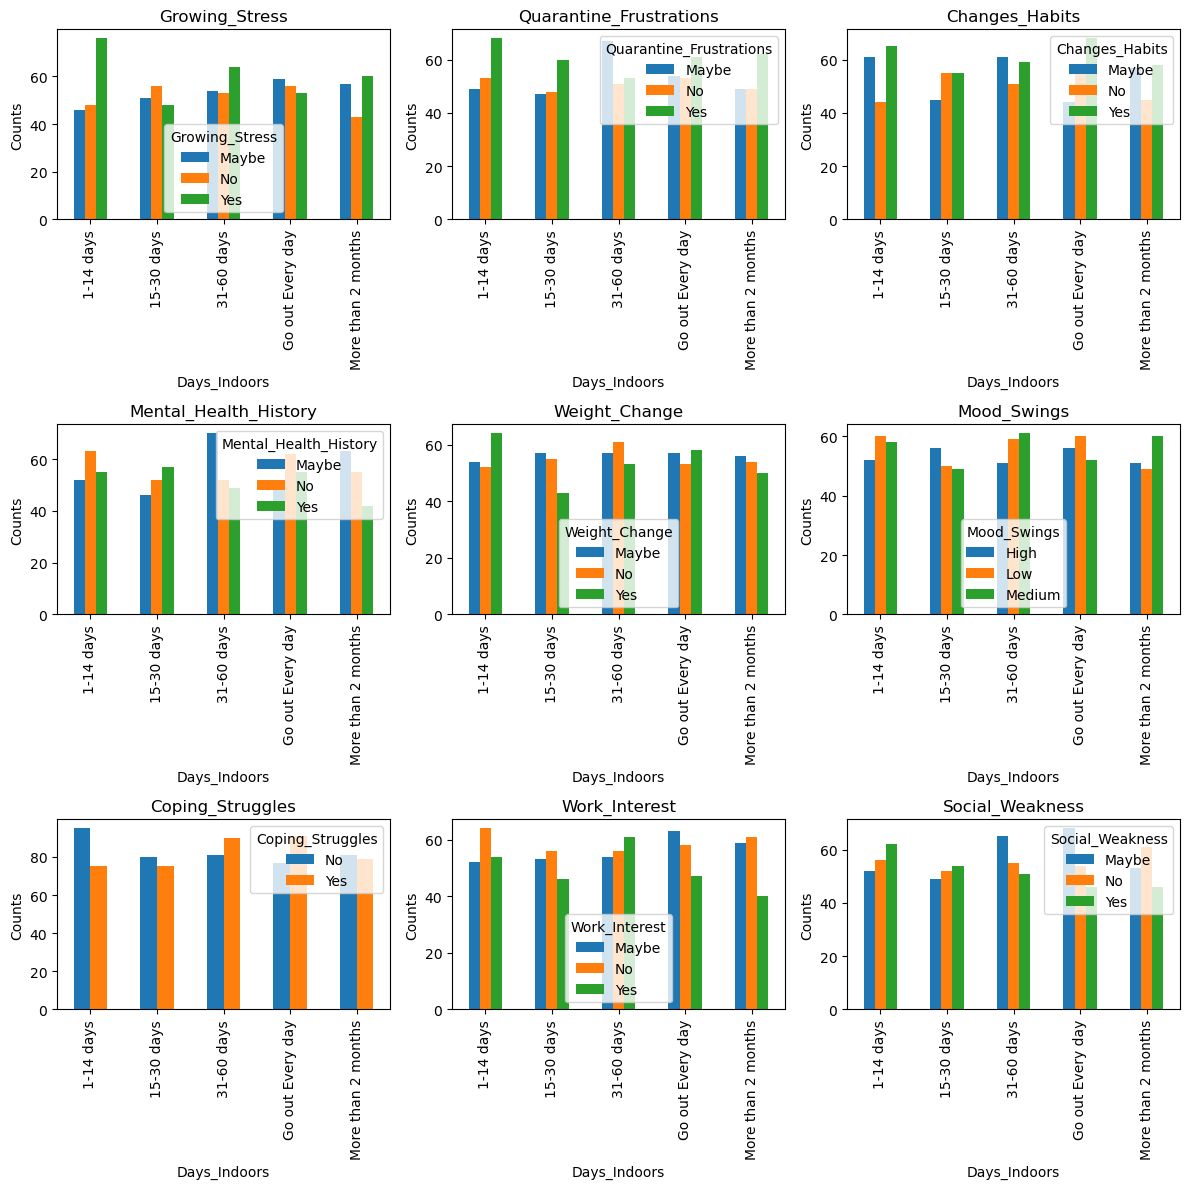

In [593]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, column in enumerate(mental_health_columns):
    row = i // 3
    col = i % 3
    print(i, column, row, col)
    df.groupby('Days_Indoors')[column].value_counts().unstack().plot(kind='bar', stacked=False, ax=axs[row, col])
    axs[row, col].set_xlabel('Days_Indoors')
    axs[row, col].set_ylabel('Counts')
    axs[row, col].set_title(column)
plt.tight_layout()
plt.show()  

## Relationship Between Gender and Coping_Struggles

In [575]:
from scipy.stats import chi2_contingency

In [576]:
c_tab = pd.crosstab(df['Gender'], df['Coping_Struggles'])
alpha = 0.05
chi2, p, dof, expected = chi2_contingency(c_tab)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print()
if p < alpha :
    print("Reject the null hypothesis - Significant relationship found\nChi-squared results indicate that there is significant relationship how 'male' and 'female' cope with struggles .")
else :
    print('Fail to reject null hypothesis - No statistically significant relationship')

Chi-squared statistic: 4.124505784235549
p-value: 0.04226636445747966

Reject the null hypothesis - Significant relationship found
Chi-squared results indicate that there is significant relationship how 'male' and 'female' cope with struggles .


## Relationship Between Growing_Stress and Weight_Change

In [577]:
c_tab2 = pd.crosstab(df['Growing_Stress'],df['Weight_Change'])
alpha = 0.05
chi2, p ,dof ,expected = chi2_contingency(c_tab2)
print('Chi-squared statistic :', chi2)
print('P-value :', p)
print()
if p < alpha :
    print('Reject the null hypothesis - Significant relationship found')
else :
    print('Fail to reject null hypotheses - No statistically significant relationship')

Chi-squared statistic : 1.148592782164039
P-value : 0.8864877655212707

Fail to reject null hypotheses - No statistically significant relationship


## Relationship Between Days_Indoors and Social_Weakness

In [578]:
c_tab3 = pd.crosstab(df['Days_Indoors'], df['Social_Weakness'])
alpha = 0.05
chi2, p, dof, expected = chi2_contingency(c_tab3)
print('chi-squared value: ', chi2)
print('p-value: ', p)
print()
if p < alpha:
    print('Reject the null hypothesis - Significant relationship found ')
else:
    print('Fail to reject null hypothesis - No statistically significant relationship')

chi-squared value:  8.03492316280394
p-value:  0.43006617441586015

Fail to reject null hypothesis - No statistically significant relationship


## Relationship Between  Quarantine_Frustrations and Mental_Health_History 

In [579]:
ctab4 = pd.crosstab( df['Quarantine_Frustrations'],df['Mental_Health_History'])
alpha = 0.05
chi2, p, dof, expected = chi2_contingency(ctab4)
print('chi-squared value: ', chi2)
print('p-value: ', p)
print()
if p < alpha:
    print('Reject the null hypothesis - Significant relationship found\nThe chi-squared test suggests that there is a meaningful relationship between individuals mental health history and their frustrations during quarantine ')
else:
    print('Fail to reject null hypothesis - No statistically significant relationship')

chi-squared value:  7.821605371182045
p-value:  0.09833598187096192

Fail to reject null hypothesis - No statistically significant relationship


## Relationship Between Mental_Health_History and Work_Interest

In [580]:
c_tab5 = pd.crosstab(df['Mental_Health_History'], df['Work_Interest'])
alpha = 0.05
chi2, p, dof, expected = chi2_contingency(c_tab5)
print(f'Chi-squared value {chi2}')
print(f'p-value {p}')
print()
if p < alpha:
    print("Reject the null hypothesis - Significant relationship found\nRejecting the null hypothesis for 'Mental_Health_History' and 'Work_Interest' suggests a meaningful and statistically significant relationship between these variables, highlighting the importance of considering previous mental health conditions in understanding individuals work interests and engagement.")
else:
    print('Fail to reject null hypothesis - No statistically relationship found')

Chi-squared value 8.33990097853876
p-value 0.07989137517036089

Fail to reject null hypothesis - No statistically relationship found


## Relationship Between Social_Weakness and Work_Interest

In [581]:
c_tab6 = pd.crosstab(df['Social_Weakness'], df['Work_Interest'])
alpha = 0.05
chi2, p, dof, expected = chi2_contingency(c_tab6)
print(f'Chi-squared value {chi2}')
print(f'p-value {p}')
print()
if p < alpha:
    print("Reject the null hypothesis - Significant relationship found\nRejecting the null hypothesis for 'Mental_Health_History' and 'Work_Interest' suggests a meaningful and statistically significant relationship between these variables, highlighting the importance of considering mental health factors in understanding individuals work interests and engagement.")
else:
    print('Fail to reject null hypothesis - No statistically relationship found')

Chi-squared value 3.4962718011469796
p-value 0.4784454517217702

Fail to reject null hypothesis - No statistically relationship found


## Relationship Between Age and Social_Weakness

In [582]:
c_tab7 = pd.crosstab(df['Age'], df['Social_Weakness'])
alpha = 0.05
chi2, p, dof, expected = chi2_contingency(c_tab7)
print(f'Chi-squared value {chi2}')
print(f'p-value {p}')
print()
if p < alpha:
    print("Reject the null hypothesis - Significant relationship found.\nThis indicates that different age groups may experience varying levels of social weakness.")
else:
    print('Fail to reject null hypothesis - No statistically relationship found')

Chi-squared value 13.314337795162487
p-value 0.03830710902642547

Reject the null hypothesis - Significant relationship found.
This indicates that different age groups may experience varying levels of social weakness.
